# **Criptografía Cuántica**

Este taller se enfocará en el famoso protocolo de criptografía cuántica "BB84", publicado por Charles Bennett y Gilles Brassard en 1984. El principal objetivo del protocolo es crear una clave secreta entre dos individuos, Alice y Bob, la que luego podran usar para encriptar y desencriptar un mensaje oculto.

<img src="https://raw.githubusercontent.com/MIROptics/ECC2025/refs/heads/master/talleres/03_Criptografia_Cuantica/img/imag1.jpeg" width="900"/>

Durante el taller, te guiaremos a través de los diferentes pasos del protocolo para crear dicha clave secreta que permita descifrar nuestro mensaje oculto.

## Protocolo BB84

Los pasos del protocolo son los siguientes:

1. Primero, Alice elige dos cadenas de bit aleatorias, $k$ y $b$, donde cada una consta de $n$ bits. Su cadena de bits $k$ contiene los bits que ella desea codificar (con los cuales formará posteriormente la llave), mientras que $b$ determina las bases en la cual ella codificará sus bits. Entonces, para $b_i = 0$, ella codifica el i-ésimo qubit en la base Z o base computacional, por lo que si $k_i = 0$ el estado que ella envía es $|0\rangle$, y si $k_i=1$, ella envía el estado $|1\rangle $. Mientras que para $b_i=1$, ella codifica el i-ésimo qubit en la base X, por lo cual, para $k_i = 0$ ella envía $|+\rangle$ y para $k_i=1$, ella envía $|-\rangle$.

Para hacerlo más ilustrativo, representamos cada base con dos flechas perpendiculares de la siguiente forma

<img src="https://raw.githubusercontent.com/MIROptics/ECC2025/refs/heads/master/talleres/03_Criptografia_Cuantica/img/imag2.jpeg" width="600"/>

2. Una vez que Alice termina de codificar sus $n$ qubits, ella los envía a Bob. Por el lado de Bob, este también elige una cadena aleatoria de bits $\tilde{b}$ formada de $n$ bits que determina en qué bases va a realizar sus medidas. Él almacena los resultados de sus mediciones $\tilde{k}_i$ en una tabla juntos con los correspondientes bits $\tilde{b}_i$.

3. Por último, Alice y Bob comparan sus bits $b_i $ y $\tilde{b}_i$, con los que escogieron sus respectivas bases. Siempre que $b_i \neq \tilde{b}_i$, Bob midió en una base distinta a la que Alice codificó su qubit, por lo que obtiene cada resultado con probabilidad $\frac{1}{2}$. Sin embargo, si $b_i = \tilde{b}_i$, prepararon y midieron el qubit en la misma base, por lo que (a menos que alguien haya espiado) Bob obtendrá los bits de la clave que Alice codificó, $\tilde{k}_i = k_i$. Estos bits son los que componen entonces la clave.

En resumen, BB84 se puede ejemplicar de la siguiente manera

<img src="https://raw.githubusercontent.com/MIROptics/ECC2025/refs/heads/master/talleres/03_Criptografia_Cuantica/img/imag3.jpeg" width="800"/>

## **Ejercicio 1: BB84 ideal**

En primer lugar, veremos cómo el protocolo funciona cuando no hay nadie interceptando el mensaje entre Alice y Bob. Luego, veremos cómo ellos pueden detectar la presencia de este espía malicioso.

Como siempre, comenzaremos importando los módulos que necesitaremos durante el tutorial

In [1]:
pip install git+https://github.com/MIROptics/ECC2025.git

  Cloning https://github.com/MIROptics/ECC2025.git to /tmp/pip-req-build-p7wnj3wy
  Running command git clone --filter=blob:none --quiet https://github.com/MIROptics/ECC2025.git /tmp/pip-req-build-p7wnj3wy
  Resolved https://github.com/MIROptics/ECC2025.git to commit 1c968c2d6317787ab9d635b1d5e1ce0c2354d936
  Preparing metadata (setup.py) ... done


In [2]:
#  Importamos los módulos que necesitaremos para realizar el ejercicio
from qiskit_aer import Aer
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from numpy.random import randint
import numpy as np

## Paso 1

Alice primero debe generar de forma aleatoria sus cadenas de bits $k$ y $b$, a las que llamaremos `alice_bits` y `alice_bases`, respectivamente. Para esto, utilizamos la función `randint` de numpy para generar claves pseudo aleatorias

In [3]:
# Inicializamos una distribución aleatoria
np.random.seed(seed=0)

n = 100 # Largo de la cadena de bits

#  Generamos la cadena de bits aleatorios k de Alice
alice_bits = randint(2, size=n )

#  Generamos la cadena de bit aleatorios b de Alice
alice_bases = randint(2, size=n)

print(alice_bases)

[1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]


## Paso 2

A continuación deberás completar la función `alice_prepare_qubit` que crea una lista `qubit`, donde cada elemento es un circuito representando el qubit que es enviado por alice. Las entradas de esta función son `a_bits` correspondientes a los bits que codifica Alice y `a_bases`, con la cadena de bits con que Alice prepara las bases.

**HINT:** Recuerda que si el bit en `a_bases` es `0`, implica preparar el estado en la base $Z$, mientras que si es `1`, Alice prepara el estado en la base $X$.

In [4]:
def alice_prepare_qubit(a_bits, a_bases):
    '''
    Inputs:
        a_bits  (list) : bit string k
        a_bases (list): bit string b
    Outputs:
        qubit   (list): contains the circuit that generates each Alice's
                state according k and b.
    '''
    qubit = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
    # ------------------------------------------------
        # Prepara los qubits en la base Z (base computacional/polarización horizontal/vertical)
        if a_bases[i] == 0:
          if a_bits[i] == 0:
            pass
          else:
            qc.x(0)
        # Prepara los qubits en la base X (base diagonal)
        else:
          if a_bits[i] == 0:
            qc.h(0)
          else:
            qc.x(0)
            qc.h(0)
    # ------------------------------------------------
        qc.barrier()
        qubit.append(qc)
    return qubit

In [5]:
#Aplicamos la función recien creada a todos los bits aleatorios de Alice
protocol = alice_prepare_qubit(alice_bits, alice_bases)

Notemos que el primer bit en `alice_bits` es `0`, y se codifica en la base $X$, por lo que el circuito del protocolo se ve de la siguiente manera

bit = 0
basis = 1


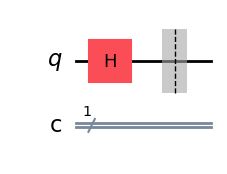

In [6]:
print('bit = %i' % alice_bits[0])
print('basis = %i' % alice_bases[0])
protocol[0].draw(output='mpl')

Como otro ejemplo, podemos ver

bit = 1
basis = 0


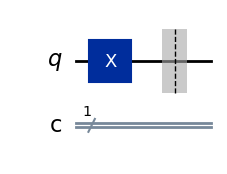

In [7]:
bit_index = 4
print('bit = %i' % alice_bits[bit_index])
print('basis = %i' % alice_bases[bit_index])
protocol[bit_index].draw(output='mpl')

## Paso 3

Generamos una cadena aleatoria $\tilde{b}$ para Bob que llamaremos `bob_bases` y que determinará en qué base realizará su medida

In [8]:
#  Generamos la cadena de bit aleatorios b tilde de Bob
bob_bases = randint(2, size=n)

print(bob_bases)

[1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1]


Ahora deberás completar la función `measure_qubit` que aplica la medida de Bob a través de una simulación y almacena los resultados en la lista `measurements`.

In [9]:
def measure_qubit(circuit, bases):
    '''
    Inputs:
        circuit      (list) : contains the qubits sent by Alice
        bases        (list) : bit string b tilde
    Outputs:
        measurements (list) : bit string k tilde
    '''
    measurements = []
    for i in range(n):
# ------------------------------------------------
      if bases[i] == 0: #medir en la base computacional Z
        circuit[i].measure(0,0)
      else:
        circuit[i].h(0)
        circuit[i].measure(0,0)
# ------------------------------------------------
      aer_sim = Aer.get_backend('aer_simulator')
      result = aer_sim.run(circuit[i], shots=1024, memory=True).result()
      measured_bit = int(result.get_memory()[0])
      measurements.append(measured_bit)
    return measurements

Al aplicar la función, obtenemos el siguiente circuito

In [10]:
#Medicion de Bob
bob_results = measure_qubit(protocol,bob_bases)

base = 1


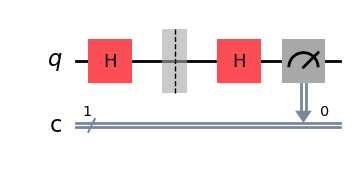

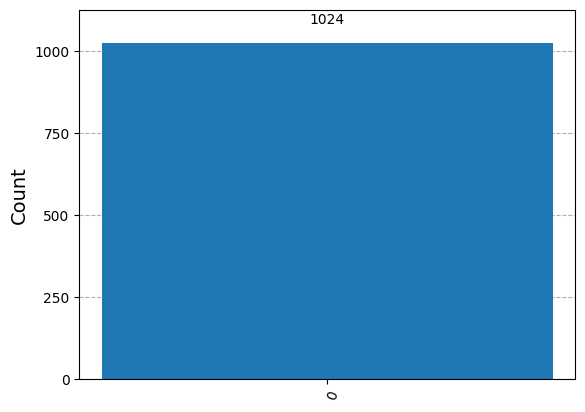

In [11]:
print("base = " + str(bob_bases[0]))
display(protocol[0].draw(output='mpl'))
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(protocol[0])
plot_histogram(job.result().get_counts())


Como Bob elegió la misma base que Alice, aseguramos que obtiene el resultado `0`. Sin embargo, pudo haber pasado que la elección aleatoria de Bob no fuese la misma de Alice, por lo que Bob tendría un $50 \%$ de coincidir con el bit que quiso enviar Alice, como es en el siguiente caso

base de Alice = 0
base de Bob = 1


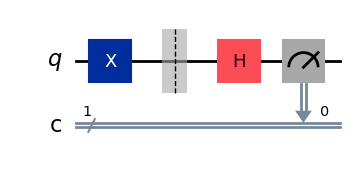

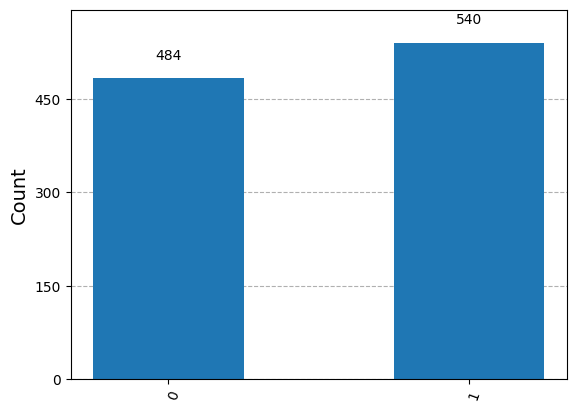

In [12]:
bit_index = 6
protocol[bit_index].draw(output='mpl')
aer_sim = Aer.get_backend('aer_simulator')
print("base de Alice = " + str(alice_bases[bit_index]))
print("base de Bob = " + str(bob_bases[bit_index]))
display(protocol[bit_index].draw(output='mpl'))
job = aer_sim.run(protocol[bit_index])
plot_histogram(job.result().get_counts())

## Paso 4

Alice hace público las bases en que codificó sus qubits y Bob revela en qué base los midió. Deberás completar la función `remove_garbage` que descartará los bits cuando no se cumple $b_i = \tilde{b}_i$. En el caso que la última condición sí se cumpla, deberás añadir los bits a la lista `good_bits`

In [14]:
def remove_garbage(a_bases, b_bases, bits):
    '''
    Inputs:
        a_bases   (list) : bit string b
        b_bases   (list) : bit string b tilde
        bits      (list) : bits that we keep or discard
    Outputs:
        good_bits (list): contains the bits we keep
    '''
    good_bits = []
#--------------------------------------------------------
    for i in range(n):
      if a_bases[i] == b_bases[i]:
        good_bits.append(bits[i])
#--------------------------------------------------------
    return good_bits

De esta forma, Alice y Bob descartan los bits que no utilizarán, quedando así los bits que formarán parte de la clave secreta

In [17]:
#Alice y Bob remueven los qubit que no se van a utilizar
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
print(alice_key)

bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
print(bob_key)

len(bob_key)

[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]
[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]


48

## Paso 5

Parte de la clave secreta de Alice y Bob se utilizan para verificar si comparten la misma cadena de bits. Para hacer esta comparación, utilizamos la función `sample_bits` con la que extraemos aleatoriamente un número de bits de la clave, que indicamos en `selection`

In [19]:
def sample_bits(bits, selection):
    '''
    Inputs:
        bits      (list) : bit string
        selection (list) : bits that we select from the list "bits"
    Outputs:
        sample    (list) : sample bits to compare
    '''
    sample = []
    for i in selection:
        # usamos np.mod para asegurarnos que el bit que escibimos siempre
        # esté en la lista de rango:
        i = np.mod(i,len(bits))
        # pop(i) elimina el elemento de la lista con índice i
        sample.append(bits.pop(i))
    return sample

Notar que Alice y Bob hacen pública esta muestra, pero como los bits ya no son secretos, no serán parte de la clave

In [20]:
# Alice y Bob comparan algunos bits para corroborar de que el protocolo funcionó

# Tamaño de la muestra
sample_size = 15

# Bits a seleccionar
bit_selection = randint(len(alice_key),size= sample_size)

# Definimos la muestra
bob_sample = sample_bits(bob_key, bit_selection)
alice_sample = sample_bits(alice_key, bit_selection)

print("  bob_sample = " + str(bob_sample))
print("alice_sample = "+ str(alice_sample))

  bob_sample = [0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0]
alice_sample = [0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0]


Si el protocolo funcionó correctamente sin ninguna interferencia, las muestras (samples) de Alice y Bob deberían coincidir, por lo que la siguiente línea debería entegarnos el valor lógico `True`

In [21]:
bob_sample == alice_sample

True

Si la anterior condición se cumplió, significa que (con alta probabilidad) `alice_key == bob_key`. De esta forma, Alice y Bob comparten una clave secreta que pueden usar para encriptar y desencriptar mensajes.

In [22]:
print(bob_key)
print(alice_key)
print("El largo de la llave es %i" % len(alice_key))

[0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0]
[0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0]
El largo de la llave es 33


# **Ejercicio 2: Eve al ataque**

Veamos ahora cómo Alice y Bob pueden saber si un espía malicioso, que llamaremos Eve, ha estado intentando interceptar su mensaje. Luego que Alice realice el paso 1 y 2, y antes que que Bob reciba los qubits, Eve intentará extraer información de ellos. Establezcamos una semilla diferente para obtener un conjunto específico de resultados "aleatorios" reproducibles

## Paso 1 y 2

Al igual que en el ejercicio anterior, Alice genera dos cadenas de bits aletorias con las que prepara los qubits

In [23]:
np.random.seed(seed=3)
alice_bits = randint(2, size= n)
alice_bases = randint(2, size= n)
protocol = alice_prepare_qubit(alice_bits, alice_bases)

En este caso, el primer qubit que Alice envía está en el estado $|+\rangle$

Base de Alice:  1
Bit de Alice:  0


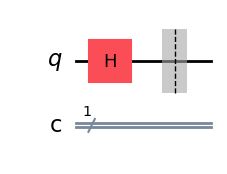

In [24]:
print("Base de Alice: ", alice_bases[0])
print("Bit de Alice: ", alice_bits[0])
protocol[0].draw(output="mpl")

### ¡Ataque!

Eve intercepta los qubits que Alice envía públicamente y los mide con una selección aleatoria de bases, de la misma manera que Bob lo hará más adelante.

In [25]:
# Generamos la cadena bits aleatorios de Eve
eve_bases =  randint(2, size=n)

# Eve mide sujeto a eve_bases
intercepted_message = measure_qubit(protocol, eve_bases)

print(intercepted_message)

[1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1]


Podemos ver que para el primer qubit la elección aleatoria de base de Eve no es la misma que la de Alice, y esto cambiará el estado del qubit de $|+\rangle$, a un estado aleatorio en la base $Z$, con $50 \%$ de probabilidad que sea $|0\rangle$ ó $|1\rangle$.

Base de Eve:  0


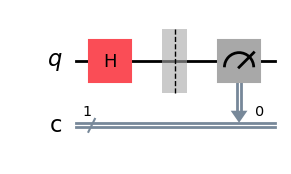

In [26]:
print("Base de Eve: ", eve_bases[0])
protocol[0].draw(output="mpl")

## Paso 3

Eve genera un qubit en su base y se lo envía a Bob para que lo mida. En este caso, Bob eligió (por casualidad) medir con la misma base en la que Alice preparó el qubit. Sin la intervención de Eve, se garantizaría que Bob mide 0, pero debido a que Eve intentó leer el mensaje, ahora tiene un $50 \% $ de probabilidades de medir 1.

Base de Bob:  1


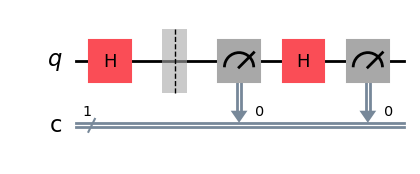

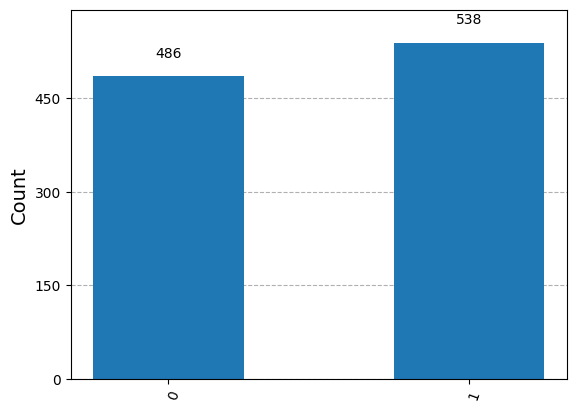

In [27]:
bob_bases = randint(2, size = n)
print("Base de Bob: ", bob_bases[0])
bob_results = measure_qubit(protocol, bob_bases)
display(protocol[0].draw(output="mpl"))
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(protocol[0])
plot_histogram(job.result().get_counts())

## Paso 4

Bob y Alice revelan las bases que seleccionaron y descartan los bits que no usaran

In [28]:
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)

## Paso 5

Bob y Alice comparan la misma selección aleatoria de sus claves para ver si su mensaje fue interceptado

In [29]:
sample_size = 15
bit_selection = randint(len(alice_key), size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
alice_sample = sample_bits(alice_key, bit_selection)

print("  bob_sample = " + str(bob_sample))
print("alice_sample = "+ str(alice_sample))
print("Is alice_key equal to bob_key? " + str(bob_sample == alice_sample))

  bob_sample = [1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0]
alice_sample = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Is alice_key equal to bob_key? False


¡La clave de Bob y Alice no coinciden! Sabemos que esto es porque Eve intentó obtener información de clave entre el paso 2 y 3, lo que cambió los estados de los qubits. Sin embargo, Alice y Bob podrían pensar que se debió al ruido en el medio que enviaron los qubits. De todas maneras, ellos descartarán esta clave y repetirán el protocolo de nuevo. El intento de intercepción de Eve ha fallado.


# **Análisis del Riesgo**

Para este tipo de intercepción, en el cual Eve mide todos los qubits, hay una pequeña posibilidad de que la muestra (sample) de Alice y Bob coincidad, y que Alice envié su mensaje con la presencia del espía malicioso, Eve. Vamos a calcular esta posibilidad y ver cuán arriesgado es hacer distribución de claves cuánticas.

<img src="https://raw.githubusercontent.com/MIROptics/ECC2025/refs/heads/master/talleres/03_Criptografia_Cuantica/img/imag4.jpeg" width="900"/>

Si Alice y Bob utilizan 1 bit para la muestra, la probabildad de que sus claves coincidan en presencia de un espía es igual a $0.75$. Si comparan 2 bits, la probabilidad decrece a $0.75^2 = 0.5625$. Podemos ver que la probabilidad de que Eve pase desapercibida decrece a medida que Alice y Bob aumentan el largo de su muestra, tal que

$ P_\text{indetectada} = 0.75^f$

donde $f$ es el largo de la muestra.

Si decidimos comparar 15 bits como hicimos anteriormente, hay un $1.3\%$ de posibilidades de que Eve no sea detectada. Si esto nos parece demasiado arriesgado, podríamos comparar 50 bits en su lugar, y tendríamos un $0.00006\%$ de posibilidades de ser espiados sin saberlo.

# **Encriptación del Mensaje**

Una vez que la clave fue distribuida, Alice puede encriptar su mensaje usando la técnica one-time pad: ella simplemente suma los bits de la clave con los que ella quiere enviar. Por lo que si ella posee una clave $c$ y su mensaje lo codifica en una cadena de bits $m$, el mensaje encriptado será $e = m \oplus c \; \text{mod} \; 2$. Bob podrá desencriptar el mensaje añadiendo su clave al mensaje encriptado, tal que $m = e \oplus c \; \text{mod} \; 2$.

# **Protocolo Completo**

In [ ]:
np.random.seed(seed=4)
n = 100
# Paso 1
alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)
# Paso 2
protocol = alice_prepare_qubit(alice_bits, alice_bases)
# Ataque!
eve_bases = randint(2, size=n)
intercepted_qubits = measure_qubit(protocol, eve_bases)
# Paso 3
bob_bases = randint(2, size=n)
bob_results = measure_qubit(protocol, bob_bases)
# Paso 4
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
# Step 5
sample_size = 10 # Cambia esto a algo más bajo y mira si Eve
                 # puede interceptar el mensaje sin que Alice
                 # y Bob lo sepan
bit_selection = randint(n, size=sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
alice_sample = sample_bits(alice_key, bit_selection)

if bob_sample != alice_sample:
    print("La interferencia de Eve fue detectada.")
else:
    print("Eve no fue detectada")